<img align="left" width="300" height="2000" src="two.png">
&nbsp;                                                                                                                            
&nbsp;

# <center> <h1>Pocket Algorith MNIST Data Set</h1> </center> 
#### <center> <h1>in JULIA</h1> </center>

In [11]:
using MLDatasets, Images, TestImages                     # using MNIST data set and images

In [12]:
train_x, train_y = MNIST.traindata()          
test_x, test_y = MNIST.testdata();

Each MNIST image has a size of 28*28 = 784 pixels. Each pixel for simplicity is treated as being off or on, see image of the six. The black pixel are on and the outliers are off.

In [13]:
size(train_x)                                            

(28, 28, 60000)

<img align="center" width="200" height="500" src="six.png">

In [14]:
size(train_y)

(60000,)

In [15]:
size(train_x[:,:,1])

(28, 28)

In [16]:


X = [reshape(train_x[:,:,i], 784, 1) for i = 1:60000] 
size(X)



(60000,)

The pixels are trained and reshaped into a vector, sort of like a train and fit into the algorithm one at a time, As the image below depicts:
&nbsp;

<img align="center" width="200" height="500" src="vector.png">


In [17]:
size(reshape(train_x[:,:,1], 784, 1)) 

(784, 1)

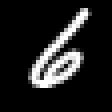

In [71]:
colorview(Gray, train_x[:, :, 1000]')

In [37]:
train_y[1000]

6

In [72]:
pocket_train_x = []
pocket_train_y = []
indices = []
for i = 1:6000
    if train_y[i] == 1 || train_y[i] == 6
        push!(pocket_train_x, reshape(train_x[:,:,i], 784))
        push!(pocket_train_y,  train_y[i] == 1 ? 1 : -1)
    end
end



In [73]:
size(pocket_train_x[1])

(784,)

In [74]:
w = rand(785)

function sign(w, x)
    x = push!(copy(x), 1.0)
    return w'x > 0 ? 1 : -1
end


function errors(w)
    return sum([sign(w, pocket_train_x[i]) != pocket_train_y[i] ? 1 : 0
            for i = 1:size(pocket_train_x)[1]])
    
end



errors (generic function with 1 method)

In [75]:
function pocket_algorithm(w, T)    
    w_hat = copy(w)
    for i = 1:T
        for j = 1:size(pocket_train_x)[1]
            #println(size(pocket_train_x[j]))
            if sign(w, pocket_train_x[j]) != pocket_train_y[j]  
                w += pocket_train_y[j] * push!(copy(pocket_train_x[j]),1.0)
                if errors(w) < errors(w_hat)
                    w_hat = copy(w)
                end
            end
        end
    end
    return w_hat
end

pocket_algorithm (generic function with 1 method)

In [76]:
errors(w)

608

In [77]:
w = rand(785)
w_new = pocket_algorithm(w,10)

785-element Array{Float64,1}:
 0.4762957604796676  
 0.1793182916339744  
 0.9152912177678387  
 0.7977217950700719  
 0.3186685500674138  
 0.7991682537162019  
 0.9090848967908594  
 0.8867815382568762  
 0.06238755686357722 
 0.5082780523482675  
 0.8591320982788055  
 0.4494000289649167  
 0.8451086896198747  
 ⋮                   
 0.37950383231021867 
 0.6564283365400052  
 0.8968721171268912  
 0.535873205109441   
 0.28825116759512137 
 0.024794788700200687
 0.021097769013332934
 0.6931821818596018  
 0.10542477315560417 
 0.2969884479232634  
 0.07645896904947502 
 0.6627946228631902  

In [85]:
sign(w_new, pocket_train_x[6]) 

-1

Our desired output is depicted below:
<img align="center" width="300" height="500" src="output.png">

In [87]:
function check_value(i)
    println("The predicted value is")
    println(sign(w_new, reshape(test_x[:,:,indices[i][1]], 784)) == 1 ? 1 : 5)
    colorview(Gray, test_x[:,:,indices[i][1]]')
end
#[reshape(train_x[:,:,i], 784, 1) for i = 1:60000]

check_value (generic function with 1 method)

The predicted value is
1


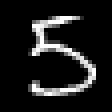

In [88]:
check_value(5)

In [89]:
indices

2027-element Array{Any,1}:
 (3, 1)   
 (6, 1)   
 (9, 5)   
 (15, 1)  
 (16, 5)  
 (24, 5)  
 (30, 1)  
 (32, 1)  
 (38, 1)  
 (40, 1)  
 (41, 1)  
 (46, 5)  
 (47, 1)  
 ⋮        
 (9947, 1)
 (9951, 1)
 (9956, 1)
 (9957, 1)
 (9970, 1)
 (9971, 5)
 (9979, 1)
 (9983, 5)
 (9985, 1)
 (9989, 5)
 (9995, 1)
 (9999, 5)

In [90]:
indices = []
for i in 1:size(test_y)[1]
    if test_y[i] == 1 || test_y[i] == 5
        push!(indices, (i,test_y[i]))
    end
end

The predicted value is
1


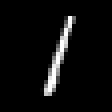

In [91]:
println("The predicted value is")
println(sign(w_new, reshape(test_x[:,:,3], 784)) == 1 ? 1 : 5)
colorview(Gray, test_x[:,:,3]')